# EDA 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/Housing.csv")
# https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [28]:
print("================================= INFO =================================")
print(df.info())
print("\n================================= COLUMNS =================================")
print(df.columns.values)
print("\n================================= DESCRIBE =================================")
print(df.describe())
print("\n=================================== DF ===================================")
df.head()

================================= INFO =================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

================================= COLUMNS =================================

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [40]:
print("=================================== CHECK NULL VALUES ===================================")
print(df.isnull().value_counts())
print("\n=================================== CHECK TYPES ===================================")
print(df.dtypes)
print("\n=================================== CHECK ONLY NUMERIC COLUMNS FOR PREPROCESSING ===================================")
print(df.select_dtypes(include=["int", "float"]))

=================================== CHECK NULL VALUES ===================================
price  area   bedrooms  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus
False  False  False     False      False    False     False      False     False            False            False    False     False               545
Name: count, dtype: int64

=================================== CHECK TYPES ===================================
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

=================================== CHECK ONLY NUMERIC COLUMNS FOR PREPROCESSING ===================================
        price  area

# FEATURE ENGINEERING

In [47]:
print("======================================== ENCODING 'YES', 'NO' values into '1', '0' ========================================")

df[df.select_dtypes(include=["object"]).columns] = (df.select_dtypes(include=["object"])
    .replace(["yes", "no", "furnished", "semi-furnished", "unfurnished"], [1, 0, 2, 1, 0]))

df.head()

======================================== ENCODING 'YES', 'NO' values into '1', '0' ========================================


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


=============================== SEE THE VALUES IN HIST TO CHECK THE DISTRIBUTION ==============================


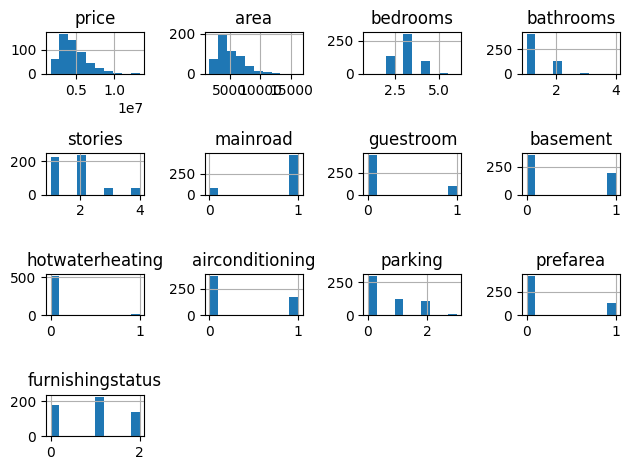

<Axes: >

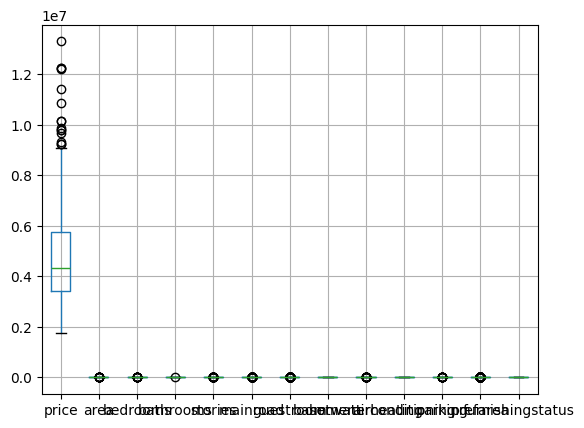

In [50]:
print("=============================== SEE THE VALUES IN HIST TO CHECK THE DISTRIBUTION ==============================")

df.select_dtypes(include="int64").hist()
plt.tight_layout()
plt.show()

df.select_dtypes(include="int64").boxplot()

===================== FINDINGS FROM THE HEATMAP =====================
***'price' is highly correlated with 'area', 'bathrooms' and 'airconditioning'***


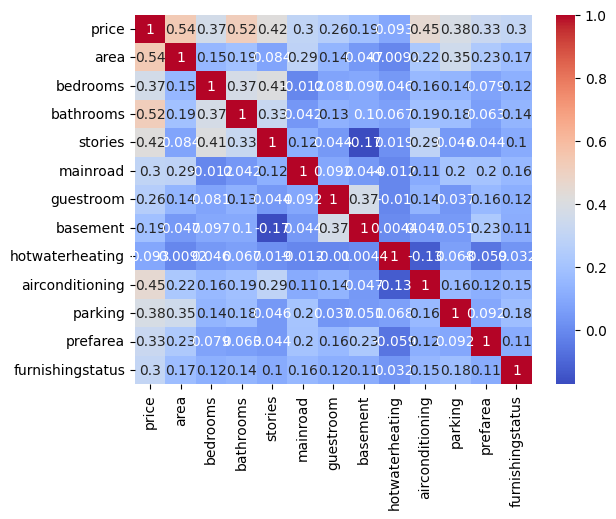

In [57]:
#sns.pairplot(df)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
print("===================== FINDINGS FROM THE HEATMAP =====================")
print("***'price' is highly correlated with 'area', 'bathrooms' and 'airconditioning'***")



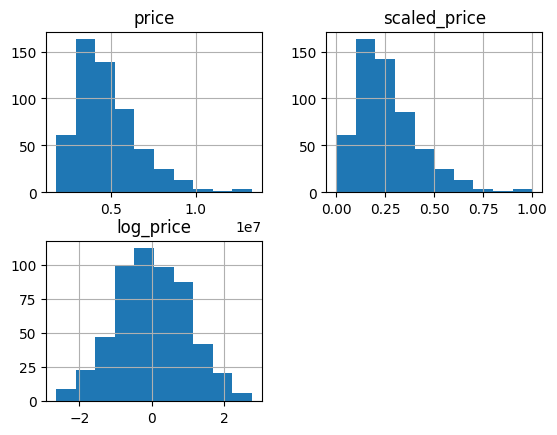

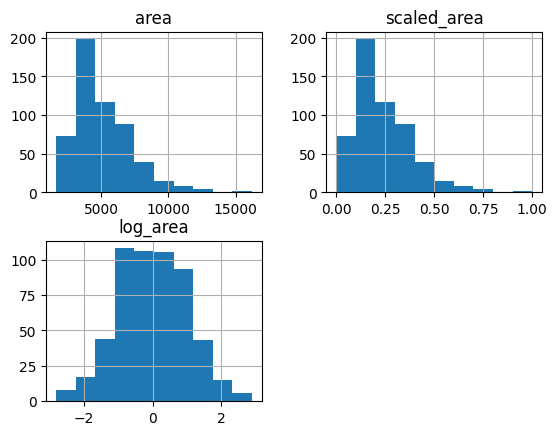

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

price_scaler = MinMaxScaler()
area_scaler = MinMaxScaler()

df["scaled_price"] = price_scaler.fit_transform(df[["price"]])
df["scaled_area"] = area_scaler.fit_transform(df[["area"]])

log_price = PowerTransformer()
log_area = PowerTransformer()

df["log_price"] = log_price.fit_transform(df[["price"]])
df["log_area"] = log_price.fit_transform(df[["area"]])

scaled_vs_log_price = df[["price", "scaled_price", "log_price"]].hist()
scaled_vs_log_are = df[["area", "scaled_area", "log_area"]].hist()

In [51]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [26]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,scaled_price,scaled_area,log_price,log_area
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02,5.450000e+02
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275,0.261189,0.240587,-1.835677e-14,-3.546195e-15
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373,0.161943,0.149151,1.000919e+00,1.000919e+00
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.649870e+00,-2.820162e+00
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145455,0.134021,-6.848354e-01,-6.869862e-01
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.224242,0.202749,-3.865654e-02,-5.799972e-02
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.345455,0.323711,7.029461e-01,7.446617e-01
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.770977e+00,2.888980e+00
